In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def inception_module(x, filters: list[int]):
    tower_1 = keras.layers.Conv2D(filters[0], (1, 1), padding="same", activation="relu")(x)
    tower_1 = keras.layers.Conv2D(filters[1], (3, 3), padding="same", activation="relu")(tower_1)

    tower_2 = keras.layers.Conv2D(filters[2], (1, 1), padding="same", activation="relu")(x)
    tower_2 = keras.layers.Conv2D(filters[3], (5, 5), padding="same", activation="relu")(tower_2)

    tower_3 = keras.layers.AveragePooling2D((3, 3), strides=(1, 1), padding="same")(x)
    tower_3 = keras.layers.Conv2D(filters[4], (1, 1), padding="same", activation="relu")(tower_3)

    tower_4 = keras.layers.Conv2D(filters[5], (1, 1), padding="same", activation="relu")(x)

    concatenated = keras.layers.Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
    return concatenated


def build_google_net(model_name: str):
    input_layer = keras.layers.Input(shape=preprocessing_utils.images.shape[1:])

    x = keras.layers.Conv2D(
        64, (7, 7), strides=(2, 2), padding="same", activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)
    )(input_layer)
    x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding="same")(x)

    x = keras.layers.Conv2D(
        64, (1, 1), padding="same", activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)
    )(x)
    x = keras.layers.Conv2D(
        192, (3, 3), padding="same", activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)
    )(x)
    x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding="same")(x)

    x = inception_module(x, [64, 128, 32, 32, 32, 32])
    x = inception_module(x, [128, 192, 96, 64, 64, 64])

    x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding="same")(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.5)(x)

    output_layer = keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax")(x)

    model = keras.models.Model(name=model_name, inputs=input_layer, outputs=output_layer)

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
google_net_wrapper = ModelWrapper("GoogleNet", preprocessing_utils=preprocessing_utils)

In [8]:
google_net_wrapper.build_model(build_fn=build_google_net, model_name=google_net_wrapper.model_name)

Building model...
Model: "GoogleNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 64, 64)   0           ['conv2d[0][0]']                 
                                                                        

In [9]:
google_net_wrapper.train_and_save_model(batch_size=32)

Epoch 1/100
129/129 [==============================] - ETA: 0s - loss: 3.8457 - accuracy: 0.0759
Epoch 1: val_loss improved from inf to 3.78239, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 7s 36ms/step - loss: 3.8457 - accuracy: 0.0759 - val_loss: 3.7824 - val_accuracy: 0.0599 - lr: 0.0100
Epoch 2/100
127/129 [============================>.] - ETA: 0s - loss: 3.8006 - accuracy: 0.0709
Epoch 2: val_loss improved from 3.78239 to 3.74932, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 30ms/step - loss: 3.8003 - accuracy: 0.0710 - val_loss: 3.7493 - val_accuracy: 0.0599 - lr: 0.0100
Epoch 3/100
127/129 [============================>.] - ETA: 0s - loss: 3.7310 - accuracy: 0.0851
Epoch 3: val_loss improved from 3.74932 to 3.63987, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 3.7309 - accuracy: 0.0856 - val_loss: 3.6399 - val_accuracy: 0.1014 - lr: 0.0100
Epoch 4/100
127/129 [============================>.] - ETA: 0s - loss: 3.5959 - accuracy: 0.1120
Epoch 4: val_loss improved from 3.63987 to 3.43907, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 3.5943 - accuracy: 0.1129 - val_loss: 3.4391 - val_accuracy: 0.1244 - lr: 0.0100
Epoch 5/100
127/129 [============================>.] - ETA: 0s - loss: 3.4000 - accuracy: 0.1693
Epoch 5: val_loss improved from 3.43907 to 3.30086, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 3.3993 - accuracy: 0.1695 - val_loss: 3.3009 - val_accuracy: 0.1705 - lr: 0.0100
Epoch 6/100
127/129 [============================>.] - ETA: 0s - loss: 3.2490 - accuracy: 0.2074
Epoch 6: val_loss improved from 3.30086 to 3.16415, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 3.2480 - accuracy: 0.2072 - val_loss: 3.1641 - val_accuracy: 0.1982 - lr: 0.0100
Epoch 7/100
127/129 [============================>.] - ETA: 0s - loss: 3.0656 - accuracy: 0.2453
Epoch 7: val_loss improved from 3.16415 to 3.06287, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 3.0633 - accuracy: 0.2454 - val_loss: 3.0629 - val_accuracy: 0.2535 - lr: 0.0100
Epoch 8/100
127/129 [============================>.] - ETA: 0s - loss: 2.9345 - accuracy: 0.2768
Epoch 8: val_loss improved from 3.06287 to 2.99900, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 2.9350 - accuracy: 0.2761 - val_loss: 2.9990 - val_accuracy: 0.2581 - lr: 0.0100
Epoch 9/100
127/129 [============================>.] - ETA: 0s - loss: 2.8036 - accuracy: 0.3123
Epoch 9: val_loss improved from 2.99900 to 2.87005, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 2.8056 - accuracy: 0.3118 - val_loss: 2.8701 - val_accuracy: 0.2811 - lr: 0.0100
Epoch 10/100
127/129 [============================>.] - ETA: 0s - loss: 2.6106 - accuracy: 0.3725
Epoch 10: val_loss improved from 2.87005 to 2.79046, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 32ms/step - loss: 2.6104 - accuracy: 0.3727 - val_loss: 2.7905 - val_accuracy: 0.3180 - lr: 0.0100
Epoch 11/100
127/129 [============================>.] - ETA: 0s - loss: 2.3884 - accuracy: 0.4299
Epoch 11: val_loss improved from 2.79046 to 2.68452, saving model to ../../artifacts/checkpoints\checkpoint_GoogleNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_GoogleNet\assets


129/129 [==============================] - 4s 31ms/step - loss: 2.3913 - accuracy: 0.4301 - val_loss: 2.6845 - val_accuracy: 0.3364 - lr: 0.0100
Epoch 12/100
127/129 [============================>.] - ETA: 0s - loss: 2.2170 - accuracy: 0.4902
Epoch 12: val_loss did not improve from 2.68452
129/129 [==============================] - 3s 21ms/step - loss: 2.2212 - accuracy: 0.4875 - val_loss: 2.8235 - val_accuracy: 0.3548 - lr: 0.0100
Epoch 13/100
127/129 [============================>.] - ETA: 0s - loss: 1.9912 - accuracy: 0.5588
Epoch 13: val_loss did not improve from 2.68452
129/129 [==============================] - 3s 20ms/step - loss: 1.9944 - accuracy: 0.5580 - val_loss: 2.8312 - val_accuracy: 0.3364 - lr: 0.0100
Epoch 14/100
127/129 [============================>.] - ETA: 0s - loss: 1.8394 - accuracy: 0.6161
Epoch 14: val_loss did not improve from 2.68452
129/129 [==============================] - 3s 21ms/step - loss: 1.8428 - accuracy: 0.6162 - val_loss: 2.7395 - val_accuracy: 0.

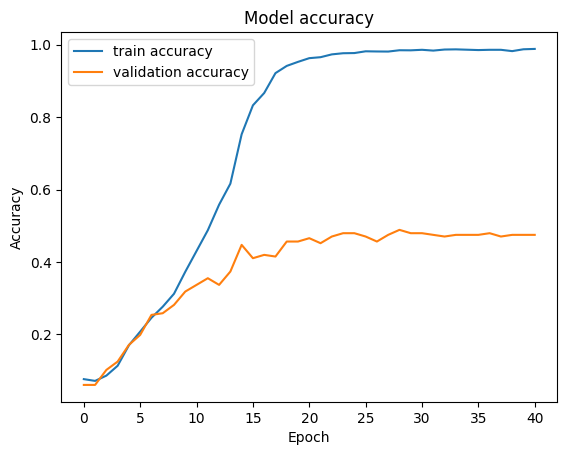

In [10]:
google_net_wrapper.plot_accuracy()

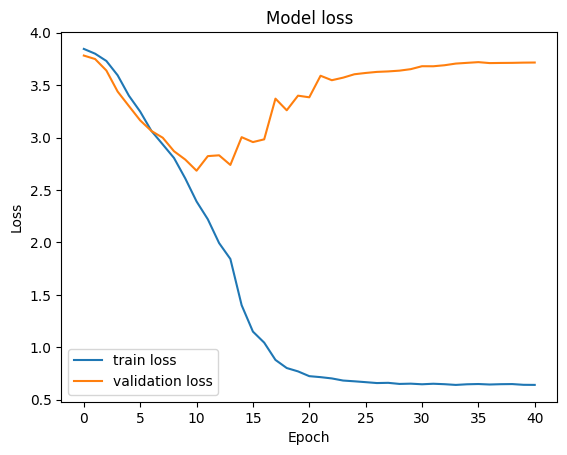

In [11]:
google_net_wrapper.plot_loss()

In [12]:
google_net_wrapper.load_model()

Loading model from "../../artifacts/models/GoogleNet.h5"...
Model loaded successfully!


20/20 [==============================] - 1s 20ms/step - loss: 3.8535 - accuracy: 0.4265
Loss: 3.8535
Accuracy: 0.4265
20/20 [==============================] - 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.26      0.39        23
           1       0.46      0.44      0.45        25
           2       0.53      0.60      0.56        52
           3       0.24      0.21      0.22        38
           4       0.60      0.44      0.51        27
           5       0.36      0.46      0.41        35
           6       0.35      0.40      0.38        45
           7       0.33      0.20      0.25        10
           8       0.50      0.42      0.45        12
           9       0.31      0.36      0.33        11
          10       0.41      0.30      0.35        23
          11       0.37      0.42      0.39        26
          12       0.32      0.41      0.36        32
          13       0.33      0.33      0.33     

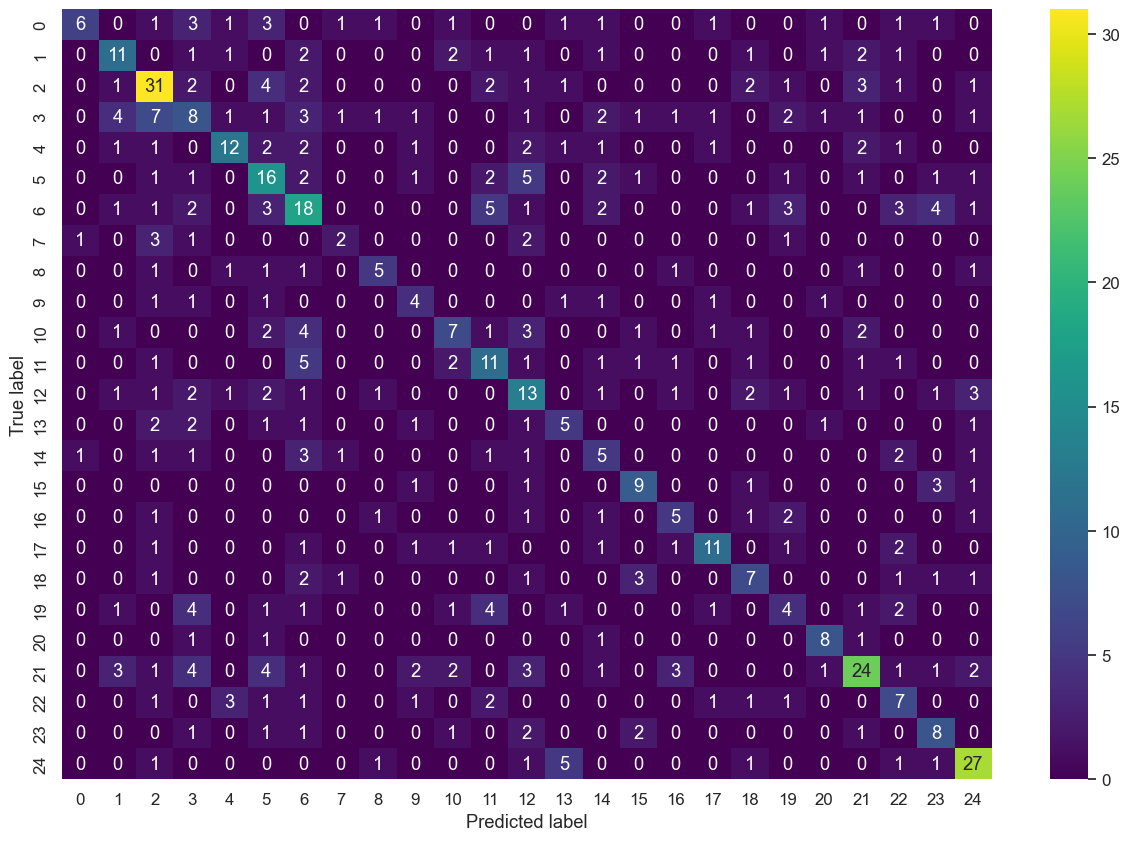

In [13]:
google_net_wrapper.display_evaluation_results()